##### problem : 그냥 바이그램 -> 너무 쓸 데 없는 단어들이 많음
##### idea : 유니그램 빈도를 세어서 상위에 있는 단어를 제외한 뒤 바이그램 해보자

# 1. 자주 사용되는 단어 제거(불용어 제거)

In [1]:
import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.stem.porter import PorterStemmer  # 어근추출
from nltk.tokenize import RegexpTokenizer  # 정규표현식을 사용하여 단어 토큰화를 제공
from nltk.corpus import stopwords  # 불용어 정의
import os
import glob
import re
from collections import Counter

default_path = r'C:\Users\suhyun\Downloads\food_review\tai' # 기본 경로
food_review_total = pd.DataFrame() # 통합할 변수 선언 및 초기화

tokenizer = RegexpTokenizer('[\w]+')  # \w : 단어 영문자+숫자+_(밑줄) [0-9a-zA-Z_]
stop_words = stopwords.words('english')  # 불용어 정의

os.chdir(default_path) 
countries = os.listdir()
os.chdir('review')
food_path = glob.glob('*.csv')
#확장자명을 비교해 csv 리스트들을 만든다.
for path in food_path:
    food_review = pd.read_csv(path, encoding = "UTF-8")
    food_review['label'] = os.path.splitext(os.path.basename(path))[0]
    food_review_total = pd.concat([food_review_total, food_review])

food_review_total = food_review_total.reset_index(drop = True)   
food_review_total = food_review_total[food_review_total['lang'] == 'en']

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

food_reviews = food_review_total['content'].apply(lambda x:emoji_pattern.sub('', str(x)))

lines = []
for i in food_reviews:
    lines.append(i)
lines = ' '.join(lines)

In [3]:
def english_tokenizer(lines):
    tokenizer = RegexpTokenizer('[\w]+')  # \w : 단어 영문자+숫자+_(밑줄) [0-9a-zA-Z_]

    stop_words = stopwords.words('english')  # 불용어 정의

    ### 영단어 전처리 과정
    words =lines.lower()  # 모든 단어를 소문자로 변환
    tokens = tokenizer.tokenize(words)  # 단어 단위로 토큰화
    stopped_tokens = [i for i in list((tokens)) if not i in stop_words]  # 불용어 제거
    words = [i for i in stopped_tokens if len(i)>1]  # 한 글자 제거
    
    return words



     

uni-gram으로 내림차순 정렬 후 상위 20개 단어를 불용어로 새롭게 정의

In [4]:
words = english_tokenizer(lines)
stop_words2 = pd.Series(words).value_counts().head(20)  # 리스트 안의 단어들을 pandas Series 형태로 변환 후 단어 빈도를 카운트
stop_words2 = list(stop_words2.keys())

print(stop_words2)

['food', 'good', 'great', 'service', 'restaurant', 'place', 'staff', 'nice', 'thai', 'friendly', 'best', 'really', 'us', 'delicious', 'one', 'back', 'would', 'also', 'time', 'recommend']


음식점 별로 리뷰를 모아서 전처리한다

In [ ]:
reviews_by_label = food_review_total.groupby(['label'])['content'].apply(lambda x:' '.join(list(x)))

for i in range(len(reviews_by_label)):
    reviews_by_label[i] = re.sub('[^a-zA-Z]', ' ',reviews_by_label[i])
    reviews_by_label[i] = english_tokenizer(reviews_by_label[i])

In [ ]:
#식당 한개만 가지고 바이그램 돌려보기 - 일반 바이그램
print(reviews_by_label.keys()[10])
pd.Series(words).value_counts().head(20)

bi_gram = []
bi_tokens = ngrams(words,2)

for i in bi_tokens:
    print(i)
    bi_gram.append(i)
    
sort = sorted(bi_gram, key = lambda x : x[0])
count = Counter(sort)

# 2. 바이그램

In [ ]:
#식당 한개만 가지고 바이그램 돌려보기 - 유니그램 상위단어 20개 제거한 바이그램
words = [i for i in list((reviews_by_label[1])) if not i in stop_words2]  # 불용어 제거2
print(reviews_by_label.keys()[10])
pd.Series(words).value_counts().head(20)

In [92]:
bi_gram = []
bi_tokens = ngrams(words,2)

for i in bi_tokens:
    print(i)
    bi_gram.append(i)
    
sort = sorted(bi_gram, key = lambda x : x[0])
count = Counter(sort)

('young', 'girl')
('girl', 'serving')
('serving', 'kind')
('kind', 'helpful')
('helpful', 'polite')
('polite', 'remember')
('remember', 'name')
('name', 'deserves')
('deserves', 'praise')
('praise', 'hospitality')
('hospitality', 'bun')
('bun', 'soft')
('soft', 'soggy')
('soggy', 'option')
('option', 'toasted')
('toasted', 'bun')
('bun', 'review')
('review', 'truck')
('truck', 'wonderfruit')
('wonderfruit', 'festival')
('festival', 'hope')
('hope', 'get')
('get', 'actual')
('actual', 'burger')
('burger', 'double')
('double', 'meat')
('meat', 'cheeseburger')
('cheeseburger', 'complaints')
('complaints', 'bun')
('bun', 'sweet')
('sweet', 'foreign')
('foreign', 'taste')
('taste', 'roasted')
('roasted', 'sauce')
('sauce', 'lacking')
('lacking', 'otherwise')
('otherwise', 'perfect')
('perfect', 'medium')
('medium', 'rare')
('rare', 'burger')
('burger', 'wife')
('wife', 'lunch')
('lunch', 'twice')
('twice', 'quick')
('quick', 'burgers')
('burgers', 'cooked')
('cooked', 'way')
('way', 'like')

('decided', 'give')
('give', 'nd')
('nd', 'chance')
('chance', 'time')
('time', 'saturday')
('saturday', 'th')
('th', 'october')
('october', 'time')
('time', 'around')
('around', 'pm')
('pm', 'pm')
('pm', 'ordered')
('ordered', 'new')
('new', 'chicken')
('chicken', 'burger')
('burger', 'special')
('special', 'menu')
('menu', 'long')
('long', 'story')
('story', 'short')
('short', 'special')
('special', 'actually')
('actually', 'put')
('put', 'raw')
('raw', 'chicken')
('chicken', 'skin')
('skin', 'burger')
('burger', 'judge')
('judge', 'whether')
('whether', 'steam')
('steam', 'chicken')
('chicken', 'skin')
('skin', 'raw')
('raw', 'chicken')
('chicken', 'skin')
('skin', 'either')
('either', 'way')
('way', 'ordered')
('ordered', 'fried')
('fried', 'chicken')
('chicken', 'patty')
('patty', 'million')
('million', 'dollar')
('dollar', 'question')
('question', 'means')
('means', 'either')
('either', 'chef')
('chef', 'made')
('made', 'serious')
('serious', 'blunder')
('blunder', 'intentionally

('spiked', 'shakes')
('shakes', 'bannana')
('bannana', 'shake')
('shake', 'rum')
('rum', 'going')
('going', 'make')
('make', 'home')
('home', 'worth')
('worth', 'visit')
('visit', 'amazing')
('amazing', 'beer')
('beer', 'list')
('list', 'impressed')
('impressed', 'selection')
('selection', 'happy')
('happy', 'hour')
('hour', 'fries')
('fries', 'variety')
('variety', 'burgers')
('burgers', 'shakes')
('shakes', 'enjoyed')
('enjoyed', 'lively')
('lively', 'atmosphere')
('atmosphere', 'super')
('super', 'open')
('open', 'early')
('early', 'hours')
('hours', 'morning')
('morning', 'definitely')
('definitely', 'worth')
('worth', 'visit')
('visit', 'loved')
('loved', 'hard')
('hard', 'adjusting')
('adjusting', 'thai')
('thai', 'since')
('since', 'used')
('used', 'spices')
('spices', 'went')
('went', 'online')
('online', 'found')
('found', 'degrees')
('degrees', 'people')
('people', 'extremely')
('extremely', 'clean')
('clean', 'fast')
('fast', 'exactly')
('exactly', 'needed')
('needed', 'litt

('options', 'gourmet')
('gourmet', 'burgers')
('burgers', 'make')
('make', 'chose')
('chose', 'avocado')
('avocado', 'caramelized')
('caramelized', 'onions')
('onions', 'many')
('many', 'different')
('different', 'types')
('types', 'cheese')
('cheese', 'egg')
('egg', 'bacon')
('bacon', 'plus')
('plus', 'many')
('many', 'things')
('things', 'available')
('available', 'make')
('make', 'burger')
('burger', 'awesome')
('awesome', 'truffle')
('truffle', 'fries')
('fries', 'ambiance')
('ambiance', 'cool')
('cool', 'quite')
('quite', 'late')
('late', 'lot')
('lot', 'people')
('people', 'drinks')
('drinks', 'socializing')
('socializing', 'plan')
('plan', 'visiting')
('visiting', 'next')
('next', 'time')
('time', 'ordering')
('ordering', 'nachos')
('nachos', 'saw')
('saw', 'someone')
('someone', 'else')
('else', 'table')
('table', 'made')
('made', 'mouth')
('mouth', 'water')
('water', 'make')
('make', 'super')
('super', 'burgers')
('burgers', 'staying')
('staying', 'pullman')
('pullman', 'owns'

('needed', 'grab')
('grab', 'burger')
('burger', 'thai')
('thai', 'price')
('price', 'high')
('high', 'compared')
('compared', 'baseline')
('baseline', 'bangkok')
('bangkok', 'burger')
('burger', 'ok')
('ok', 'special')
('special', 'gourmet')
('gourmet', 'experiences')
('experiences', 'felt')
('felt', 'like')
('like', 'paying')
('paying', 'much')
('much', 'two')
('two', 'time')
('time', 'winner')
('winner', 'embassy')
('embassy', 'annual')
('annual', 'hamburger')
('hamburger', 'challenge')
('challenge', 'wanted')
('wanted', 'give')
('give', 'try')
('try', 'wow')
('wow', 'disappointed')
('disappointed', 'one')
('one', 'hamburgers')
('hamburgers', 'time')
('time', 'aged')
('aged', 'american')
('american', 'beef')
('beef', 'freshly')
('freshly', 'made')
('made', 'bun')
('bun', 'served')
('served', 'formulation')
('formulation', 'imaginable')
('imaginable', 'decor')
('decor', 'upscale')
('upscale', 'trendy')
('trendy', 'diner')
('diner', 'americana')
('americana', 'art')
('art', 'deep')
('

In [93]:
dict = {
    'term1' : [],
    'term2' : [],
    'freq' : []
}

for i,j in count.items():
    dict['term1'].append(list(i)[0])
    dict['term2'].append(list(i)[1])
    dict['freq'].append(j)
    
bi_gram = pd.DataFrame(dict)
bi_gram.sort_values('freq',ascending=False,inplace=True)
bi_gram[0:50]

,term1,term2,freq
3472,pullman,hotel,15
3083,onion,rings,15
2117,happy,hour,13
1258,curly,fries,10
1107,come,back,9
4508,truffle,fries,8
644,burger,bangkok,7
1871,french,fries,7
3035,one,burger,7
4851,worth,visit,7


In [94]:
bi_gram['term'] = bi_gram['term1'] + ' ' + bi_gram['term2']
bi_gram[0:50]

,term1,term2,freq,term
3472,pullman,hotel,15,pullman hotel
3083,onion,rings,15,onion rings
2117,happy,hour,13,happy hour
1258,curly,fries,10,curly fries
1107,come,back,9,come back
4508,truffle,fries,8,truffle fries
644,burger,bangkok,7,burger bangkok
1871,french,fries,7,french fries
3035,one,burger,7,one burger
4851,worth,visit,7,worth visit


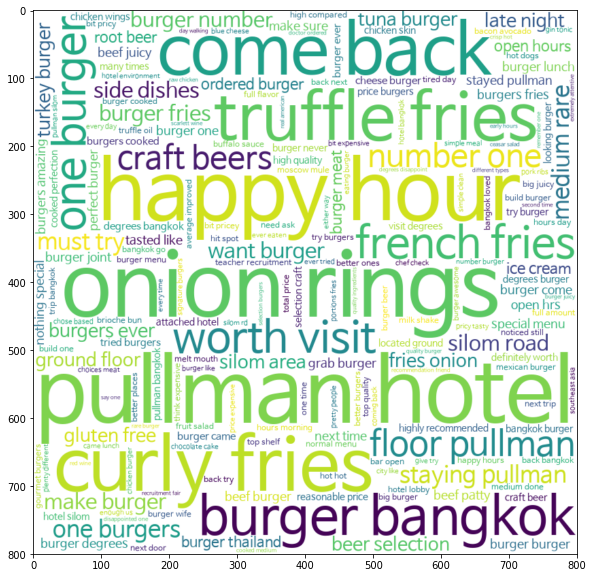

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

bi_gram = bi_gram[['term','freq']]
sample = bi_gram.set_index('term').to_dict()

font_path = "NanumBarunGothic.ttf"  # 한글이 인식 가능한 폰트 설정

wordcloud = WordCloud(
font_path = font_path,
width = 800,
height = 800,
background_color = "white"
)

wordcloud = wordcloud.generate_from_frequencies(sample['freq'])

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)"
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")  # 보간법 = 쌍선형 보간법
plt.show()

#### 기존이랑 비교 했을 때 한 눈에 봐도 쓸데 없는 단어의 출현 빈도가 줄은듯 함